# Analisador Sintático Baseado em Autômatos Finitos - Parte 3: Análise de Exemplos

Nesta parte, vamos analisar exemplos de frases usando o analisador sintático e visualizar o caminho percorrido no autômato.

In [1]:
# Importar bibliotecas necessárias
import sys
import os
from IPython.display import Image, display
sys.path.append('.')

from syntactic_analyzer import SyntacticAnalyzer
from visualize_automaton import AutomatonVisualizer

## 1. Análise de Exemplos Básicos

Vamos analisar algumas frases com diferentes estruturas sintáticas para ver como o autômato as processa.

In [6]:
# Criar um analisador sintático
analyzer = SyntacticAnalyzer()

# Exemplos de frases para análise
exemplos = [
    "O gato come o peixe.",
    "Maria estuda matemática.",
    "O professor explicou a matéria aos alunos.",
    "Eu liguei ao diretor ontem."
]

# Analisar cada exemplo
for exemplo in exemplos:
    print(f"\n{'='*50}")
    print(f"Analisando: '{exemplo}'")
    print(f"{'='*50}")
    
    explanation, _ = analyzer.explain_analysis(exemplo)
    print(explanation)


Analisando: 'O gato come o peixe.'
Frase: O gato come o peixe.

Análise Sintática:
  - 'o': ARTIGO → DET_SUJEITO
  - 'gato': SUBSTANTIVO → SUJEITO
  - 'come': VERBO → VERBO
  - 'o': ARTIGO → DET_OBJETO
  - 'peixe': SUBSTANTIVO → OBJETO
  - '.': PONTUACAO → PONTUACAO

Resultado da Análise:
  ✓ Estrutura sintática válida!

Partes da Oração:
  - Sujeito: o gato
  - Predicado: come o peixe
  - Verbo: come
  - Objeto Direto: o peixe

Analisando: 'Maria estuda matemática.'
Frase: Maria estuda matemática.

Análise Sintática:
  - 'maria': SUBSTANTIVO → SUJEITO
  - 'estuda': VERBO → VERBO
  - 'matemática': SUBSTANTIVO → OBJETO
  - '.': PONTUACAO → PONTUACAO

Resultado da Análise:
  ✓ Estrutura sintática válida!

Partes da Oração:
  - Sujeito: maria
  - Predicado: estuda matemática
  - Verbo: estuda
  - Objeto Direto: matemática

Analisando: 'O professor explicou a matéria aos alunos.'
Frase: O professor explicou a matéria aos alunos.

Análise Sintática:
  - 'o': ARTIGO → DET_SUJEITO
  - 'profe

## 2. Análise Detalhada de um Exemplo

Vamos analisar em detalhes o exemplo "Eu liguei ao diretor ontem.", que inclui um advérbio.

In [7]:
# Analisar uma frase específica
frase = "Eu liguei ao diretor ontem."
is_valid, syntactic_tokens, path = analyzer.analyze_sentence(frase)

print(f"Frase: '{frase}'")
print(f"Estrutura sintática válida: {is_valid}\n")

print("Tokens e funções sintáticas:")
for token, category, function in syntactic_tokens:
    print(f"  - '{token}': {category} → {function}")

print("\nCaminho percorrido no autômato:")
for i, (state, symbol) in enumerate(path):
    if i == 0:
        print(f"  {state} (estado inicial)")
    else:
        print(f"  {state} <-- {symbol} --")

Frase: 'Eu liguei ao diretor ontem.'
Estrutura sintática válida: True

Tokens e funções sintáticas:
  - 'eu': PRONOME → SUJEITO
  - 'liguei': VERBO → VERBO
  - 'ao': PREPOSICAO → PREPOSICAO
  - 'diretor': SUBSTANTIVO → OBJ_INDIRETO
  - 'ontem': ADVERBIO → ADVERBIO
  - '.': PONTUACAO → PONTUACAO

Caminho percorrido no autômato:
  q0 (estado inicial)
  q2 <-- SUJEITO --
  q3 <-- VERBO --
  q6 <-- PREPOSICAO --
  q8 <-- OBJ_INDIRETO --
  q8 <-- ADVERBIO --
  q9 <-- PONTUACAO --


### 2.1 Explicação do Caminho

Para a frase "Eu liguei ao diretor ontem.", o autômato segue o seguinte caminho:

1. **q0** (estado inicial)
2. **q2** ← SUJEITO ("Eu"): O pronome "Eu" é reconhecido como sujeito
3. **q3** ← VERBO ("liguei"): O verbo "liguei" é reconhecido
4. **q6** ← PREPOSICAO ("ao"): A preposição "ao" é reconhecida
5. **q8** ← OBJ_INDIRETO ("diretor"): O substantivo "diretor" é reconhecido como objeto indireto
6. **q8** ← ADVERBIO ("ontem"): O advérbio "ontem" é reconhecido
7. **q9** ← PONTUACAO ("."): A pontuação final é reconhecida, levando ao estado final

Como o autômato termina no estado final q9, a frase é considerada sintaticamente válida.

## 3. Visualização do Autômato

O módulo `visualize_automaton.py` gera visualizações do autômato e do caminho percorrido durante a análise de uma frase. Ele usa a biblioteca Graphviz para criar representações gráficas do autômato.

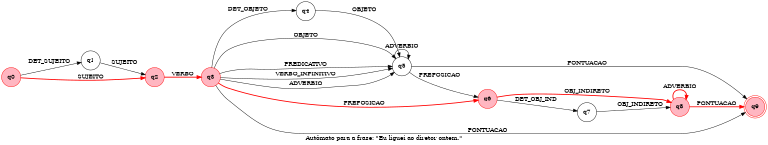

In [8]:
# Criar o visualizador
visualizer = AutomatonVisualizer()

# Visualizar uma frase
frase = "Eu liguei ao diretor ontem."
image_path, gif_path, is_valid, syntactic_tokens = visualizer.visualize_sentence(frase)

# Exibir a imagem do autômato
if os.path.exists(image_path):
    display(Image(filename=image_path))
else:
    print(f"Imagem não encontrada: {image_path}")

### 3.1 Explicação da Visualização

Na visualização do autômato:

- Os estados são representados por círculos
- O estado final (q9) é representado por um círculo duplo
- As transições são representadas por setas rotuladas com funções sintáticas
- Os estados e transições percorridos durante a análise são destacados em vermelho

Esta visualização ajuda a entender como o autômato processa a frase e como as diferentes funções sintáticas levam de um estado a outro.

## 4. Análise de Diferentes Estruturas Sintáticas

Vamos analisar frases com diferentes estruturas sintáticas para ver como o autômato lida com elas.

In [9]:
# Exemplos de frases com diferentes estruturas
estruturas = [
    # Sujeito + Verbo + Objeto Direto
    "O gato come o peixe.",
    
    # Sujeito + Verbo + Objeto Direto (sem determinante)
    "Maria estuda matemática.",
    
    # Sujeito + Verbo + Objeto Direto + Objeto Indireto
    "O professor explicou a matéria aos alunos.",
    
    # Sujeito + Verbo + Objeto Indireto + Advérbio
    "Eu liguei ao diretor ontem.",
    
    # Sujeito + Verbo de Ligação + Predicativo
    "O carro é bonito.",
    
    # Sujeito + Verbo + Advérbio
    "Ele corre rapidamente."
]

# Analisar cada estrutura
for frase in estruturas:
    is_valid, syntactic_tokens, _ = analyzer.analyze_sentence(frase)
    
    print(f"\nFrase: '{frase}'")
    print(f"Estrutura válida: {'✓' if is_valid else '✗'}")
    
    # Identificar as partes da oração
    sujeito = [token for token, _, function in syntactic_tokens 
              if function in ["SUJEITO", "DET_SUJEITO"]]
    verbo = [token for token, _, function in syntactic_tokens if function == "VERBO"]
    obj_direto = [token for token, _, function in syntactic_tokens 
                 if function in ["OBJETO", "DET_OBJETO"]]
    obj_indireto = [token for token, _, function in syntactic_tokens 
                   if function in ["OBJ_INDIRETO", "DET_OBJ_IND", "PREPOSICAO"]]
    adverbio = [token for token, _, function in syntactic_tokens if function == "ADVERBIO"]
    predicativo = [token for token, _, function in syntactic_tokens if function == "PREDICATIVO"]
    
    print("Partes da oração:")
    if sujeito:
        print(f"  - Sujeito: {' '.join(sujeito)}")
    if verbo:
        print(f"  - Verbo: {' '.join(verbo)}")
    if predicativo:
        print(f"  - Predicativo: {' '.join(predicativo)}")
    if obj_direto:
        print(f"  - Objeto Direto: {' '.join(obj_direto)}")
    if obj_indireto:
        print(f"  - Objeto Indireto: {' '.join(obj_indireto)}")
    if adverbio:
        print(f"  - Advérbio: {' '.join(adverbio)}")


Frase: 'O gato come o peixe.'
Estrutura válida: ✓
Partes da oração:
  - Sujeito: o gato
  - Verbo: come
  - Objeto Direto: o peixe

Frase: 'Maria estuda matemática.'
Estrutura válida: ✓
Partes da oração:
  - Sujeito: maria
  - Verbo: estuda
  - Objeto Direto: matemática

Frase: 'O professor explicou a matéria aos alunos.'
Estrutura válida: ✓
Partes da oração:
  - Sujeito: o professor
  - Verbo: explicou
  - Objeto Direto: a matéria
  - Objeto Indireto: aos alunos

Frase: 'Eu liguei ao diretor ontem.'
Estrutura válida: ✓
Partes da oração:
  - Sujeito: eu
  - Verbo: liguei
  - Objeto Indireto: ao diretor
  - Advérbio: ontem

Frase: 'O carro é bonito.'
Estrutura válida: ✓
Partes da oração:
  - Sujeito: o carro
  - Verbo: é
  - Predicativo: bonito

Frase: 'Ele corre rapidamente.'
Estrutura válida: ✓
Partes da oração:
  - Sujeito: ele
  - Verbo: corre
  - Advérbio: rapidamente
